In [9]:
import sys
import os
from os.path import split, join
base_dir = split(os.getcwd())[0]
if base_dir not in sys.path:
    sys.path.append(base_dir)
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from stats_tools import vis as svis
from stats_tools.as_toolbox import std_to_prob
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
import importlib
import evaluate_study
importlib.reload(evaluate_study)

<module 'evaluate_study' from 'c:\\Users\\kiril\\Thesis\\CoBra\\cobra\\t1_long\\evaluate_study.py'>

In [4]:
data_dir = join(base_dir, 'data')
data_long_dir = join(data_dir, 't1_longitudinal')

In [5]:
pred_df = pd.read_feather(join(data_long_dir, 'results', 'volume_prediction_results.feather'))
pred_df.InstanceCreationDate = pd.to_datetime(pred_df.InstanceCreationDate, format='%Y-%m-%d')
with open(join(data_long_dir, 'final', 'affected_brain_regions_dic.pkl'), 'rb') as f:
    affected_br_dic = pickle.load(f)
brain_regions_ls = [item for sublist in list(affected_br_dic.values()) for item in sublist]
with open(join(data_long_dir, 'final', 'long_sids_pairs.pkl'), 'rb') as f:
    long_sids_pairs = pickle.load(f)
with open(join(data_long_dir, 'final', 'cc_dic_ps_optmatch_const10.pkl'), 'rb') as f:
    cc_dic_ps10 = pickle.load(f)
brain_regions_ls.insert(0,'Whole_Brain')

In [38]:
importlib.reload(evaluate_study)
df_dV, df_log_dV, pred_df_f = evaluate_study.get_dV_df(brain_regions_ls, long_sids_pairs, cc_dic_ps10, pred_df)
#df_dV.head(3)
df_log_dV.iloc[:,:3].head()

,PatientID,Date_diff,Whole_Brain
0,00e520dd9e4c7f2b7798263bd0916221,101,-0.772776
1,00fa9b0bcf1d122b848d9ac4b52c9e40,213,-0.021254
2,02ef1afb3ae8de0e82a5b78fc3b73163,189,-0.297321
3,0323a5ca7fdad9cf0278cc8f774826e1,73,0.260791
4,05c1671c5462917a63f88f9d3d880a5e,64,0.460041


<AxesSubplot:xlabel='Whole_Brain', ylabel='Count'>

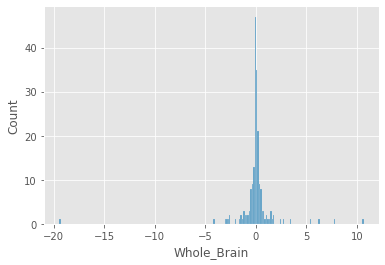

In [37]:
sns.histplot(df_log_dV, x='Whole_Brain')

In [7]:
#sns.histplot(df_dV.Date_diff)

## Visualize differences

<AxesSubplot:xlabel='Left_Posterior_Orbital_Gyrus', ylabel='Count'>

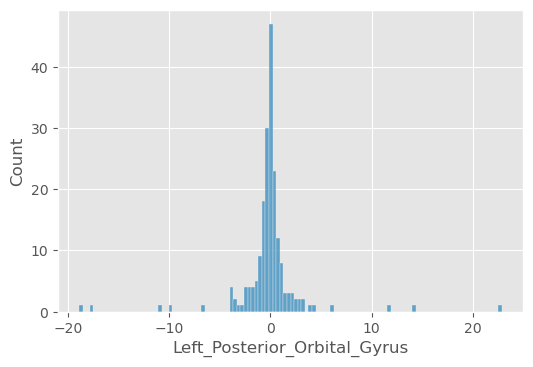

In [56]:
sns.histplot(df_log_dV.Left_Posterior_Orbital_Gyrus)

C:\Users\kiril\.conda\envs\cobra\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


(-20.0, 20.0)

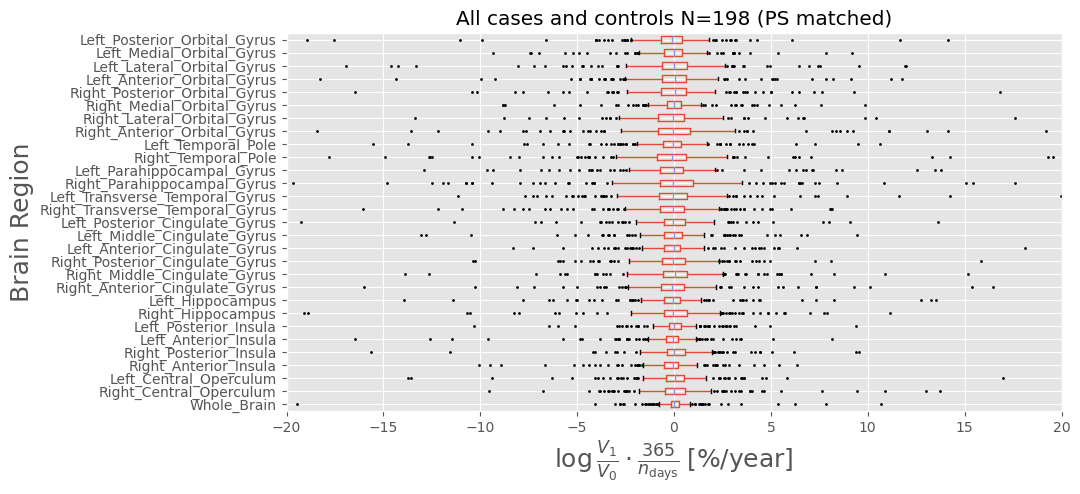

In [55]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('ggplot')
dic = df_log_dV[brain_regions_ls].boxplot(vert=False,ax=ax,flierprops={'marker': '.', 'markersize': 2, 'markerfacecolor': 'k'})
ax.set_ylabel('Brain Region', fontsize=18)
ax.set_xlabel(r'$\log{\frac{V_1}{V_0}}\cdot \frac{365}{n_{\mathrm{days}}}\:[\%/{\mathrm{year}}]$', fontsize=18)
ax.set_title('All cases and controls N=198 (PS matched)')
ax.set_xlim(-20,20)

In [105]:
def cap_data(df, columns):
    for col in columns:
        df = df.dropna(subset=[col])
        Q3 = np.percentile(df[col].to_numpy(), 75)
        Q1 = np.percentile(df[col].to_numpy(), 25)
        IQR = Q3 - Q1
        #print(Q3)
        # print(Q1)
        # print("IQR value for column %s is: %s" % (col, IQR))
        lower_range = Q1 - 2 * IQR
        upper_range = Q3 + 1.5 * IQR
        df = df[(df[col]>lower_range)]
        df = df[(df[col]<upper_range)]
    return df

In [106]:
df_log_dV_c = cap_data(df_log_dV, brain_regions_ls)

-0.1720610795872027
-0.347868377135206
-0.24503151210197852
-0.23145515907100528
-0.22112876841291082
-0.27570293329943907
-0.15072262093372935
-0.35301592695825956
-0.21478347683400362
-0.35464336992479834
-0.1263512941722755
-0.24847142362889257
-0.0675674390190987
-0.16338191693189325
-0.20302870344392407
-0.16786027577237617
-0.1413263461747853
-0.22746943812254855
-0.15480380234510896
-0.09870147473381209
-0.08859277694414017
-0.17450664629491064
-0.1418335573522669
-0.061976707731049824
-0.10493953875078163
-0.23367540541765267
-0.10245294071381354
-0.08089542191476334
-0.10273796019076831


In [107]:
df_log_dV_c

,PatientID,Date_diff,Whole_Brain,Right_Central_Operculum,Left_Central_Operculum,Right_Anterior_Insula,Right_Posterior_Insula,Left_Anterior_Insula,Left_Posterior_Insula,Right_Hippocampus,...,Right_Temporal_Pole,Left_Temporal_Pole,Right_Anterior_Orbital_Gyrus,Right_Lateral_Orbital_Gyrus,Right_Medial_Orbital_Gyrus,Right_Posterior_Orbital_Gyrus,Left_Anterior_Orbital_Gyrus,Left_Lateral_Orbital_Gyrus,Left_Medial_Orbital_Gyrus,Left_Posterior_Orbital_Gyrus
12,11c0a36c5bbfef2b4bd93f631b11a3fc,357,-0.022986,0.032496,0.222870,-0.088581,0.140839,-0.120756,0.121021,-0.159720,...,-0.106565,-0.190448,-0.512868,-0.402480,-0.066903,0.328949,-0.428415,0.021318,-0.067027,0.130876
16,1ccbf67213e938a1fb924b6eff0bfaba,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,38536363589bbf85b12d74d849d7a3c2,189,0.000895,0.036045,-0.001724,-0.043351,-0.027860,-0.002638,-0.021760,-0.001105,...,-0.009763,-0.037404,-0.048485,0.163463,-0.079241,-0.025052,-0.035334,0.028145,-0.101214,-0.099703
61,51a0c42393195174b1ccfb22267d6ac0,312,0.004795,0.060703,-0.100781,-0.047800,-0.032067,-0.044942,0.115375,-0.074014,...,0.269666,-0.047356,0.208268,0.095607,-0.032971,-0.048703,0.321845,0.067276,0.022601,0.079607
83,6e004961c689d4227ef282ccf296c287,343,-0.021717,-0.044460,0.137251,-0.231594,0.115719,-0.029840,0.044158,0.100853,...,0.173942,-0.042945,-0.174507,0.030519,0.009622,-0.514905,-0.054169,-0.110990,0.099047,0.046527
84,6ea43ee16cb277d42732fc2ed4f02125,283,0.052064,0.227166,-0.168200,0.048348,-0.007173,-0.000313,-0.126596,-0.041743,...,0.067134,-0.095106,0.074511,0.268550,0.049197,-0.441561,0.080328,0.314656,0.150774,-0.218320
101,80fe569456953c70304ab6d0ba2c3d1e,307,0.071879,0.047743,0.067069,0.004976,0.018183,0.048180,0.064282,-0.097512,...,-0.153308,-0.264650,0.025075,-0.235437,-0.021729,0.135256,0.063160,0.181389,-0.099746,-0.160121
104,842a45dd240157a1946ca28284aec359,275,0.008883,-0.118822,0.010008,0.029071,0.095708,-0.075940,-0.034137,0.005955,...,-0.085861,0.083091,-0.145124,0.008463,-0.031476,-0.027959,0.137367,0.114251,-0.021817,-0.134391
108,884cb3976459057e4af3bb8d83fc5dc8,552,-0.012961,-0.036438,0.031893,0.020488,0.056309,0.024248,-0.061238,-0.042517,...,-0.062517,-0.005545,-0.194311,-0.207059,-0.027020,0.185399,-0.233675,-0.118538,-0.019241,0.151895
120,a326a3d734ddfe563ca74b5b633ddf9a,350,-0.012136,0.127692,0.036057,0.013661,0.030988,0.041831,0.013781,-0.011614,...,-0.025862,-0.027996,0.072596,0.004400,-0.038777,0.037418,-0.026310,0.094052,-0.068544,-0.073132


## In log(V1/V0)/days*365

In [ ]:
mpl.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('ggplot')
df_dV[brain_regions_ls].boxplot(vert=False,ax=ax)
ax.set_ylabel('Brain Region', fontsize=18)
ax.set_xlabel(r'$100\frac{\Delta V}{\Delta t\cdot V_0}\:[\%/{\mathrm{day}}]$', fontsize=18)
ax.set_title('All cases and controls N=198 (PS matched)')
ax.set_xlim(-6,20)

In [16]:
importlib.reload(svis)

<module 'stats_tools.vis' from 'c:\\Users\\kiril\\Thesis\\CoBra\\cobra\\stats_tools\\vis.py'>

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

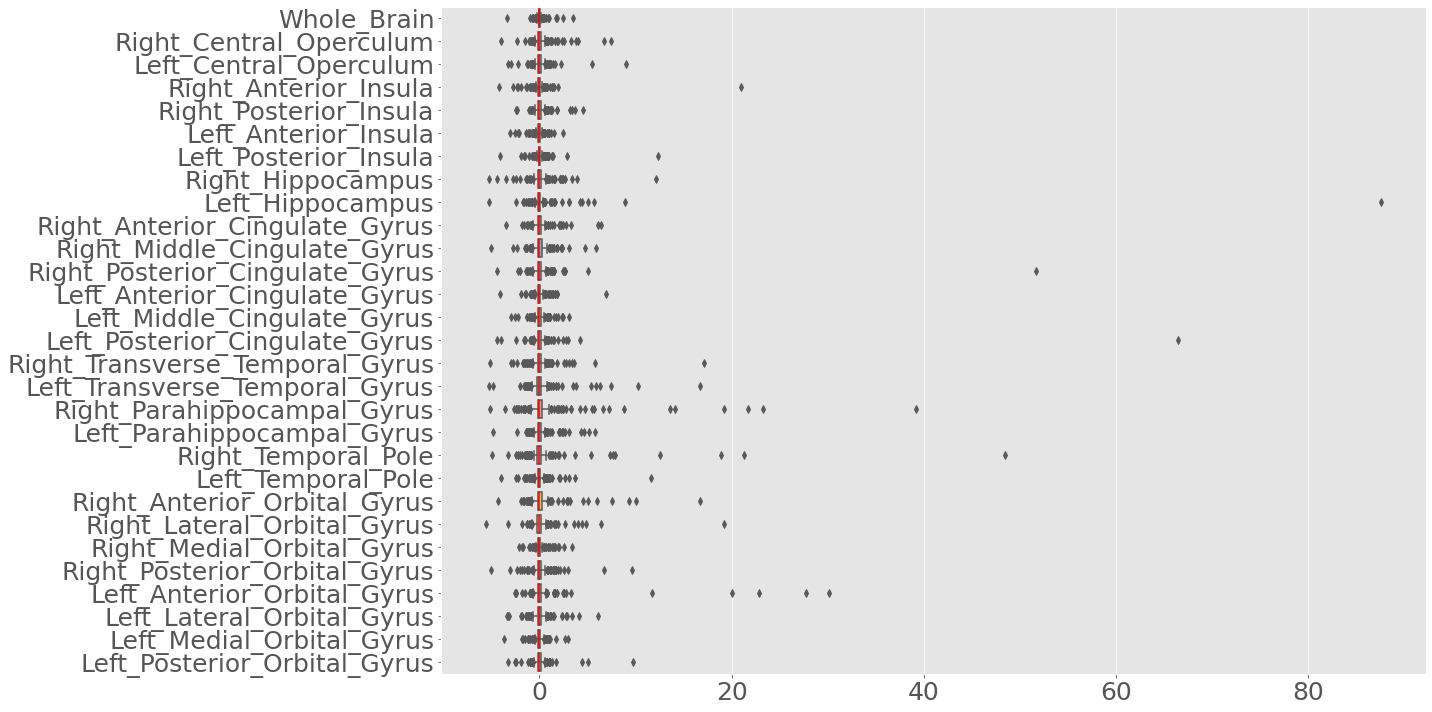

In [17]:
svis.create_boxplot(df_dV[brain_regions_ls], brain_regions_ls, orient='h',figsize=(20,10))

## Look at some of the outliers

In [44]:
LPOG_pats = df_dV[np.abs(stats.zscore(df_dV.Left_Posterior_Orbital_Gyrus)) > 3].PatientID.unique()

In [49]:
pred_df_f[pred_df_f.PatientID.isin(LPOG_pats)]

,SeriesInstanceUID,PatientID,InstanceCreationDate,newID,External_CSF,Third_Ventricle,Right_Inferior_Lateral_Ventricle,Right_Lateral_Ventricle,Left_Inferior_Lateral_Ventricle,Left_Lateral_Ventricle,...,Right_Cerebellum_Exterior,Right_Cerebellum_White_Matter,Left_Cerebellum_Exterior,Left_Cerebellum_White_Matter,Cerebellar_Vermal_Lobules_I_V,Cerebellar_Vermal_Lobules_VI_VII,Cerebellar_Vermal_Lobules_VIII_X,Background,Whole_Brain,Date_diff
1658,bb8b794033277df37a1cffe36081d7f9,d3629de9b9b95fb9238151b1315c1570,2019-12-10,078076,0,409,0,10491,9,16239,...,659,22,24,0,0,0,0,16387344,389872,19 days
1664,fe334ebff22ebca492e323f8b8f95993,d3629de9b9b95fb9238151b1315c1570,2019-11-21,078082,539,2621,2431,48567,2399,51900,...,44533,11223,43162,10264,677,164,88,15703620,1073596,0 days
3822,8af0cce5c740c66b6557fee0c9f00d02,5cde9fabf8bbf4fc3c143f2c48894148,2019-04-12,171876,237,1098,265,6683,43,3120,...,33559,2753,24363,1052,0,0,0,15970144,807072,0 days
3823,094bc2a2d85445f2f70ea3ab793efa38,5cde9fabf8bbf4fc3c143f2c48894148,2019-04-25,171885,731,939,292,10824,333,7874,...,40933,6046,33681,6247,910,4,0,15597547,1179669,13 days
4275,be8f3a8bf83045bdd01117027369d123,ef5518f0a762fe647075e3dcf148a9ff,2019-04-11,187206,556,1584,849,29282,405,31245,...,45985,13234,45734,12355,1128,107,2,15703774,1073442,7 days
4278,0c9cdc7e705364ee53b7934c42e25584,ef5518f0a762fe647075e3dcf148a9ff,2019-04-04,187212,481,1721,1496,30766,1153,33851,...,30777,7176,33638,6856,34,0,0,15825076,952140,0 days
5274,601b0997d2577cbc11463ed61eec7cce,5c09f85769967ed1c76ea85a461674df,2019-06-08,225658,860,1516,804,29847,742,38129,...,57335,14378,59836,13680,64,0,0,15587436,1189780,0 days
5816,c5c747e3e1f69a230bf6eeba71887d48,5c09f85769967ed1c76ea85a461674df,2019-07-05,249478,749,1349,544,28773,687,35741,...,61649,14160,63433,14544,0,0,0,15521436,1255780,27 days


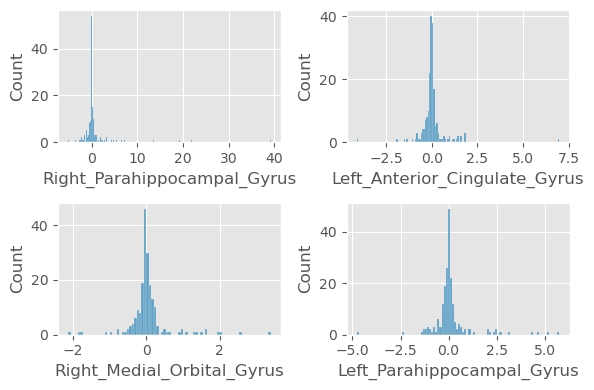

In [483]:
fig, ax = plt.subplots(2,2)
mpl.rcParams['figure.dpi'] = 100
ax = ax.flatten()
sns.histplot(df_dV.Right_Parahippocampal_Gyrus,ax=ax[0])
sns.histplot(df_dV.Left_Anterior_Cingulate_Gyrus,ax=ax[1])
sns.histplot(df_dV.Right_Medial_Orbital_Gyrus, ax=ax[2])
sns.histplot(df_dV.Left_Parahippocampal_Gyrus, ax=ax[3])

fig.tight_layout()

In [469]:
#pval_dic = compute_unadj_pvals(df_dV, cc_dic_ps10, brain_regions_ls)
#pval_dic

{'Right_Central_Operculum': 0.27173494168996526,
 'Left_Central_Operculum': 0.05450889328202235,
 'Right_Anterior_Insula': 0.2970597865149812,
 'Right_Posterior_Insula': 0.0009648057726658887,
 'Left_Anterior_Insula': 0.20514633329922605,
 'Left_Posterior_Insula': 0.08788351941504013,
 'Right_Hippocampus': 0.44730596123729405,
 'Left_Hippocampus': 0.20514633329922605,
 'Right_Anterior_Cingulate_Gyrus': 0.20514633329922605,
 'Right_Middle_Cingulate_Gyrus': 0.12281299384450661,
 'Right_Posterior_Cingulate_Gyrus': 0.1859624380178101,
 'Left_Anterior_Cingulate_Gyrus': 0.11009648434295105,
 'Left_Middle_Cingulate_Gyrus': 0.3524727453601255,
 'Left_Posterior_Cingulate_Gyrus': 0.07825552864928176,
 'Right_Transverse_Temporal_Gyrus': 0.003375011520096005,
 'Left_Transverse_Temporal_Gyrus': 0.20514633329922605,
 'Right_Parahippocampal_Gyrus': 0.3524727453601255,
 'Left_Parahippocampal_Gyrus': 0.3524727453601255,
 'Right_Temporal_Pole': 0.1859624380178101,
 'Left_Temporal_Pole': 0.15179792223956